# Ecuaciones

$$P=\frac{\Delta E _{Res}}{\Delta t}=VI \ \textbf{(1)} $$

$$Q_{H2O}=m_{H2O}C_{H2O}\Delta T \ \textbf{(2)} $$

Igualando la energía suministrada con la energía disipada

$$P\Delta t=m_{H2O}C_{H2O}\Delta T \ \textbf{(3)} $$

Hallando la resitencia experimentalmente:

$$m_{H2O}C_{H2O}\Delta T=E _{Res}=I^2R\Delta{t}$$

lo anterior equivale a:

$$R=\frac{m_{H2O}C_{H2O}\Delta T}{I^2\Delta{t}} \ \textbf{(4)}$$

La anterior ecuación por lo general no tiene unidades igual a la derecha y a la izquierda, por tal motivo se multiplica por 4.186J/cal a la expresión a la derecha de $(4)$ para convertir de cal a J.

# Librerias

In [10]:
import pandas as pd
import Algoritmosnumericos as Alg
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib widget
%config InlineBackend.figure_format = 'retina'

# Análisis Cuantitativo

## Toma 1 y 2 datos experimentales

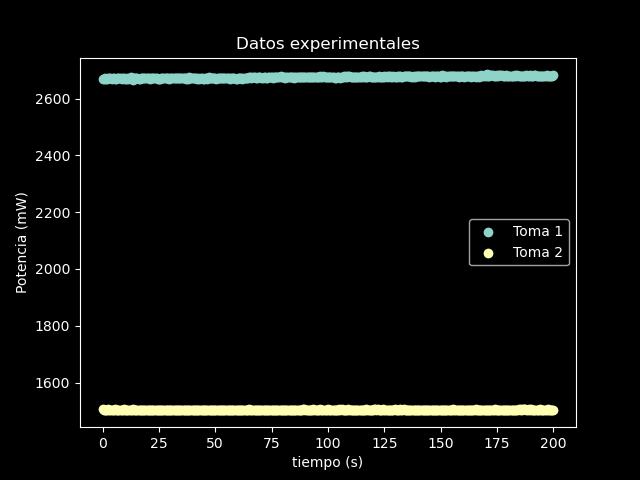

In [11]:
# Datos para cada toma
R = 4.2  # ohms
MH2O = 232.4-80.0  # g
C = 1  # cal/g°C

# Toma 1
Pvst_1 = pd.read_csv('Datos.csv',delimiter=';',decimal=',',usecols=[0,1,2,3,4])
T01 = Pvst_1['Corriente 1: Temperatura (°C)'].tolist()[0] # °C

# Toma 2
Pvst_2 = pd.read_csv('Datos.csv',delimiter=';',decimal=',',usecols=[5,6,7,8,9])
T02 = Pvst_2['Corriente 2: Temperatura (°C)'].tolist()[0] # °C

# Equivalancia J y C
Eq_teor = 4.186  # J/cal

# Gráficos
fig, ax = plt.subplots()
ax.scatter(Pvst_1['Corriente 1: Tiempo (s)'], Pvst_1['Corriente 1: Potencia (mW)'], label='Toma 1')
ax.scatter(Pvst_2['Corriente 2: Tiempo (s)'], Pvst_2['Corriente 2: Potencia (mW)'], label='Toma 2')
ax.set_title('Datos experimentales')
ax.set_ylabel('Potencia (mW)')
ax.set_xlabel('tiempo (s)')
ax.legend()
plt.show()

La gráfica concuerda con lo esperado, ya que como podemos ver la potencia es una constante. Adicionalmente el conjunto de datos con mayor potencia corresponde a la toma 1

## Energía eléctrica y térmica toma 1 y 2

In [3]:
E_elec1 = []
E_elec2 = []

for i in range(len(Pvst_1['Corriente 1: Tiempo (s)'])):
    E_elec1.append(Alg.integral_trapecio_funciondes(
        Pvst_1['Corriente 1: Tiempo (s)'].tolist(), (Pvst_1['Corriente 1: Potencia (mW)']*10**-3).tolist(), 0, i))

for i in range(len(Pvst_2['Corriente 2: Tiempo (s)'])):
    E_elec2.append(Alg.integral_trapecio_funciondes(
        Pvst_2['Corriente 2: Tiempo (s)'].tolist(), (Pvst_2['Corriente 2: Potencia (mW)']*10**-3).tolist(), 0, i))

E_termica1 = (MH2O*C*(Pvst_1['Corriente 1: Temperatura (°C)']-T01)).tolist()
E_termica2 = (MH2O*C*(Pvst_2['Corriente 2: Temperatura (°C)']-T02)).tolist()

## Equivalente mecánica calor toma 1

El valor experimental para la equivalencia entre calorias y Joules es:( 4.49 )J/cal Comparando con el 
 valor teórico que es: 4.186 J/cal el error fue 7 %
-----------------------


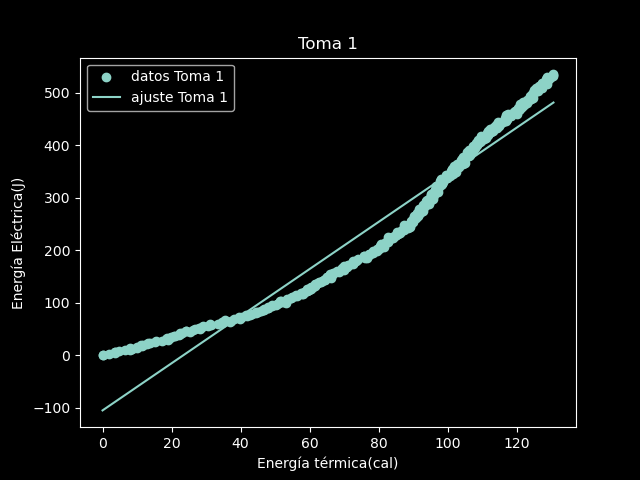

In [12]:
fig, ax = plt.subplots()
Alg.dibujo_reglineal(E_termica1, E_elec1, 0, 0, 'Toma 1',
                     'Energía térmica(cal)', 'Energía Eléctrica(J)', ax, label='Toma 1')
Eq_exp1 = round(Alg.regresionlineal(E_termica1,E_elec1)[0][0],2)
error1 = round((abs(Eq_exp1-Eq_teor)/Eq_teor)*100)
print('El valor experimental para la equivalencia entre calorias y Joules es:(', Eq_exp1,
      ')J/cal Comparando con el \n valor teórico que es:', Eq_teor, 'J/cal el error fue', error1, '%')
print('-'*23)

## Equivalente mecánica calor toma 2

El valor experimental para la equivalencia entre calorias y Joules es:( 5.91 )J/cal Comparando con el 
 valor teórico que es: 4.186 J/cal el error fue 41 %
-----------------------


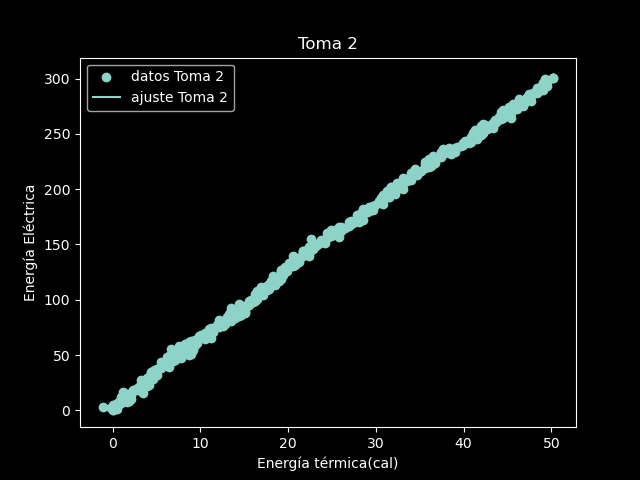

In [13]:
fig, ax = plt.subplots()
Alg.dibujo_reglineal(E_termica2,E_elec2, 0, 0, 'Toma 2',
                     'Energía térmica(cal)', 'Energía Eléctrica', ax, label='Toma 2')
Eq_exp2 = round(Alg.regresionlineal(E_termica2,E_elec2)[0][0],2)
error2 = round((abs(Eq_exp2-Eq_teor)/Eq_teor)*100)
print('El valor experimental para la equivalencia entre calorias y Joules es:(', Eq_exp2,
      ')J/cal Comparando con el \n valor teórico que es:', Eq_teor, 'J/cal el error fue', error2, '%')
print('-'*23)

Evidentemente en esta toma de datos se cometieron errores experimentales, estos mismos pueden estar asociados a fallas humanas en el laboratorio o pueden estar asociados a la mala calibración de los instrumentos

## Resistencia experimental con datos toma 1


In [6]:
ΔT=Pvst_1['Corriente 1: Temperatura (°C)'].tolist()[-1]-T01
Δt=Pvst_1['Corriente 1: Tiempo (s)'].tolist()[-1]-Pvst_1['Corriente 1: Tiempo (s)'].tolist()[0]
I=Pvst_1['Corriente 1: Corriente (mA)'].tolist()[0]*10**-3
R=round(MH2O*C*ΔT/((I**2)*Δt)*(4.186),2)#Debido a que las unidades son diferentes se multiplica por 4.186 J/C
print('El valor experimental para la primera toma es: ',R,'Ω')

El valor experimental para la primera toma es:  4.3 Ω


## Resistencia experimental con datos toma 2

In [7]:
ΔT=Pvst_2['Corriente 2: Temperatura (°C)'].tolist()[-1]-T02
Δt=Pvst_2['Corriente 2: Tiempo (s)'].tolist()[-1]-Pvst_2['Corriente 2: Tiempo (s)'].tolist()[0]
I=Pvst_2['Corriente 2: Corriente (mA)'].tolist()[0]*10**-3
R=round(MH2O*C*ΔT/((I**2)*Δt)*(4.186),2)#Debido a que las unidades son diferentes se multiplica por 4.186 J/C
print('El valor experimental para la segunda toma es: ',R,'Ω')

El valor experimental para la segunda toma es:  2.94 Ω


# Análisis cualitativo

- Describa el comportamiento de temperatura contra
tiempo obtenido. Explíquelo en términos de fenómenos físicos.

**R//** La temperatura aumenta con el tiempo ya que la energía eléctrica transmitida por los electrones se disipa en forma de calor en el resistor, esta energía a su vez se pasa al agua, lo que eleva en el tiempo su temperatura.
- ¿Qué influye, en la toma de datos, el hecho que todos
conjuntos de datos no inicien en el mismo valor de la
temperatura?

**R//** Esto influye en que el equivalente del mecánica de calor cambie y en que la energía absorbida por el agua sea diferencia, ya que como sabemos la energía absorbida por el agua depende de la diferencia de temperatura, y al cambiar la temperatura inicial cambia la temperatura

- De acuerdo a lo observado, comente sobre la relación
entre corriente eléctrica y temperatura. ¿Tienen relación? De ser así, ¿de qué tipo es la relación?

**R//** Si tienen relación, a mayor corriente eléctrica pasada, mayor será la temperatura por lo explicado anteriormente(disipación de la energía eléctrica en calor y calor transmitido al agua)

- Proponga como se puede mejorar el experimento.

**R//** Se propone el uso de una resistencia más grande, de tal forma que sea más evidente el aumento de la temperatura en el agua y del mismo modo permita analizar de mejor manera los datos. 

- ¿Que sucedería con las graficas si usara una fuente
sinusoidal?

**R//** En el experimento se uso corriente directa, por ello el agua se calentó. No obstante, si se usa una corriente sinusoidal entonces el voltaje no es constante sino una "onda". Así, en una la grafica de temperatura contra tiempo se veria no una recta (como en el casode la corriente directa), sino una recta que aumenta, se mantiene constante, y vuelve a aumentar, esto de manera ciclica.

- ¿Por qué es importante el valor de la resistencia para
este experimento?

**R//** Es importante ya que el valor de esta indica que tanta energía se disipa, esto de acuerdo a la corriente suministrada por la fuente. Si mantenemos la corriente constante y aumentamos la resistencia, la energía disipada por el resistor es mayor para un intervalo de tiempo dado, es decir aumenta la potencia en el resistor y consecuentemente aumenta la tasa de cambio de la temperatura del agua en el tiempo. Por ende debemos elejir una resistencia de valor intermedio para que el agua no aumente su temperatura ni muy rápido ni muy lento, así podemos tener datos adecuados para un mejor resultado estádistico.


# Conclusión

Los objetivos del experimento fueron estudiar la transformación de la energía eléctrica en térmica, estimar la equivalencia entre Joules y Calorias.

Podemos decir con toda certerza que pudimos estudiar la transformación de energía eléctrica a térmica, ya que como vimos en el laboratorio, la energía suministrada por la fuente,se transmitia através de energía eléctrica mediante el resistor, mismo que transmitia esta energía en forma de calor al agua.

**Ver Imagen adjunta 1**


Por otro lado verificamos que el calor y la electricidad 2 formas diferentes de energía que se pueden transformar entre sí, ya que sus unidades siguen una relación constante.


**Ver Imagen adjunta 2**

Por último obtuvimos los siguientes resultados

Equivalente mecánico del calor: (**Valor experimental:** 4.49J/cal,**Valor teórico:**4.186 J/cal) **Error** 7% 

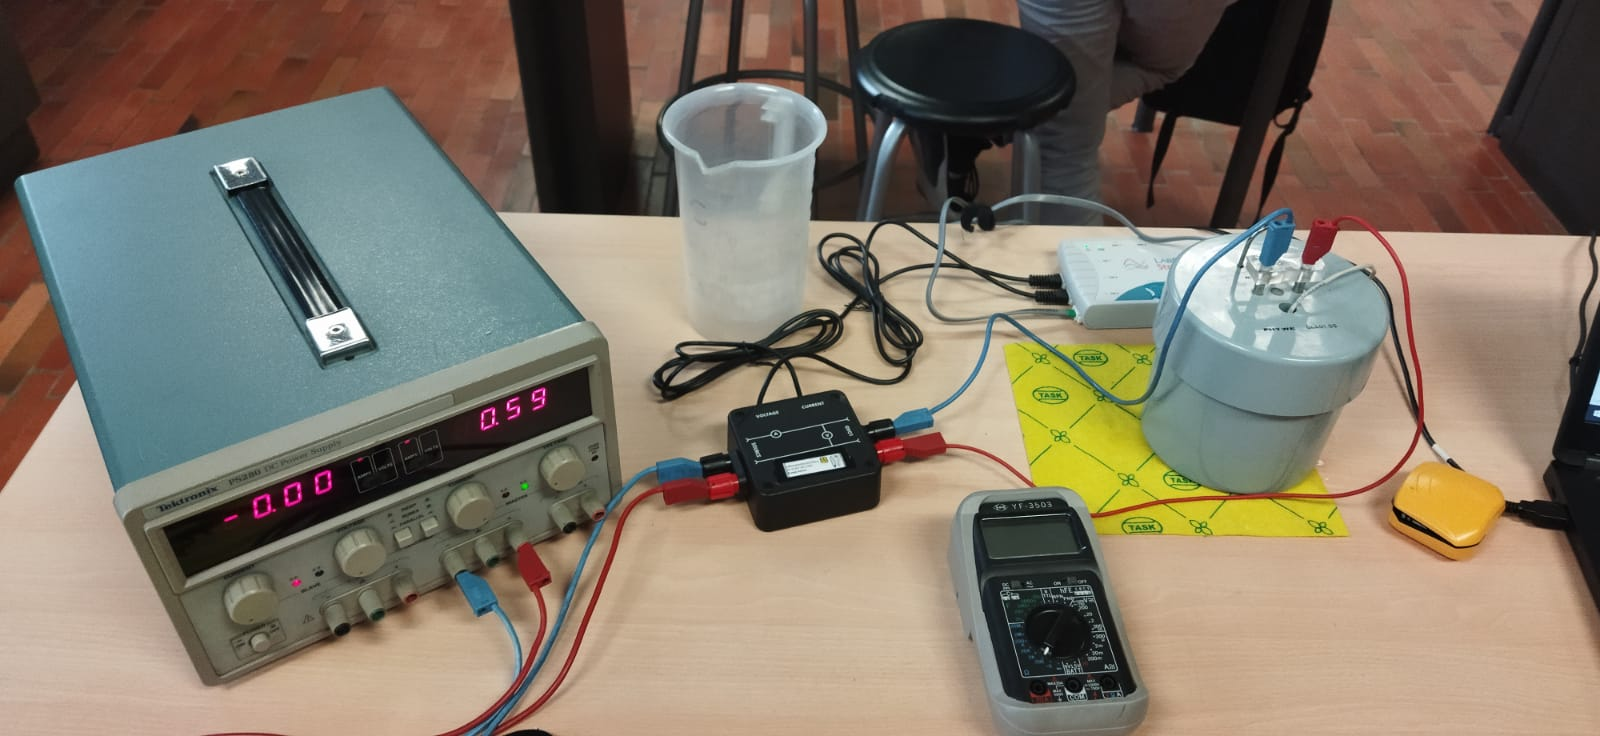

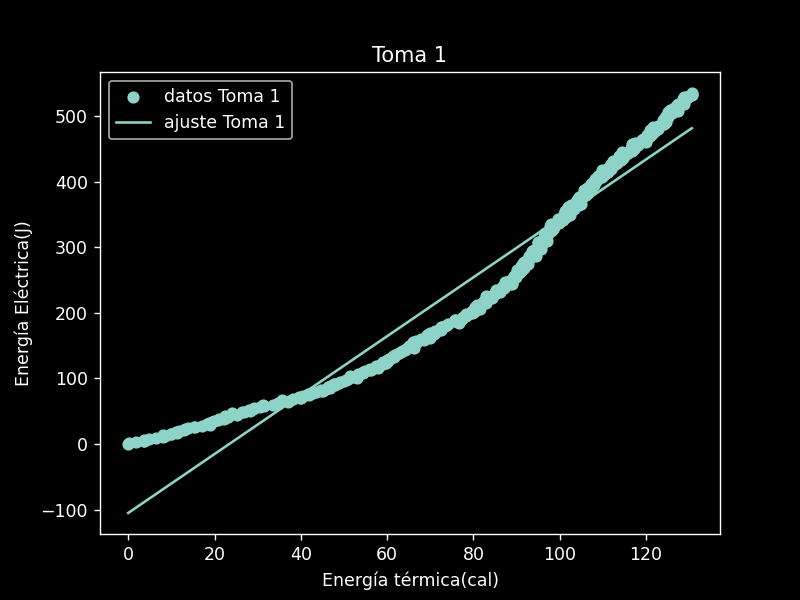